In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from math import ceil
from utils import load_images

In [2]:
def show_image_and_histogram(img, img_orig=np.array([]), filter_name=''):
    if img_orig.any():
        f = plt.figure(figsize=(15, 10))
        ax1 = f.add_subplot(221)
        ax2 = f.add_subplot(222)
        ax3 = f.add_subplot(223)
        ax4 = f.add_subplot(224)
        ax1.imshow(img_orig, cmap='gray')
        ax1.set_title('Original image')
        ax2.hist(img_orig.flatten(), bins=range(256))
        ax2.set_title('Original histogram')
        ax3.imshow(img, cmap='gray')
        ax3.set_title(f'Image after {filter_name}')
        ax4.hist(img.flatten(), bins=range(256))
        ax4.set_title(f'Histogram after {filter_name}')
    else:
        f = plt.figure(figsize=(15, 5))
        ax1 = f.add_subplot(121)
        ax2 = f.add_subplot(122)
        ax1.imshow(img, cmap='gray')
        ax1.set_title(f'Image after {filter_name}')
        ax2.hist(img.flatten(), bins=range(256))
        ax2.set_title(f'Histogram after {filter_name}')

    plt.show()

In [3]:
def show_images(images=[]):
    n_images = len(images)
    f = plt.figure(figsize=(15, 5 * n_images // 2))
    axes = dict()
    for idx, (img, title) in enumerate(images):
        axes[idx] = f.add_subplot(100 * ceil(n_images / 2) + 20 + idx + 1)
        axes[idx].imshow(img, cmap='gray')
        axes[idx].set_title(title)
    
    plt.show()

In [4]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (500, 375))
    return img

## RGB -> Gray conversion

Size: (375, 500)


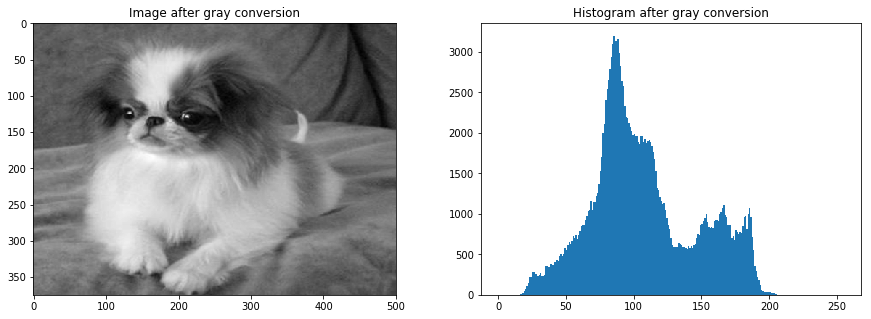

In [57]:
img = load_image('images/n02085782-Japanese_spaniel/n02085782_1855.jpg')
print("Size: {}".format(img.shape))
show_image_and_histogram(img, filter_name='gray conversion')

## Equalization

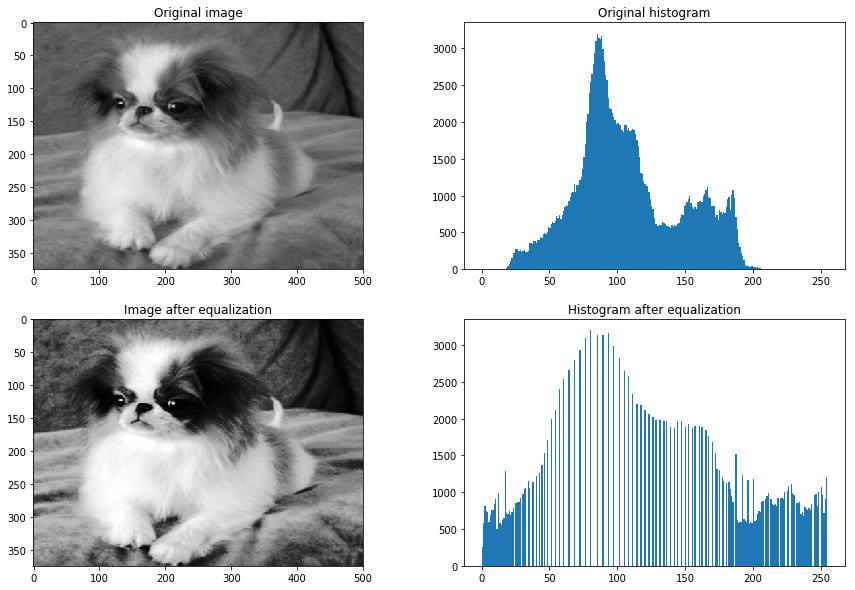

In [60]:
img_orig = load_image('images/n02085782-Japanese_spaniel/n02085782_1855.jpg')
img = cv2.equalizeHist(img_orig)
show_image_and_histogram(img, img_orig, filter_name='equalization')

## Filter: average

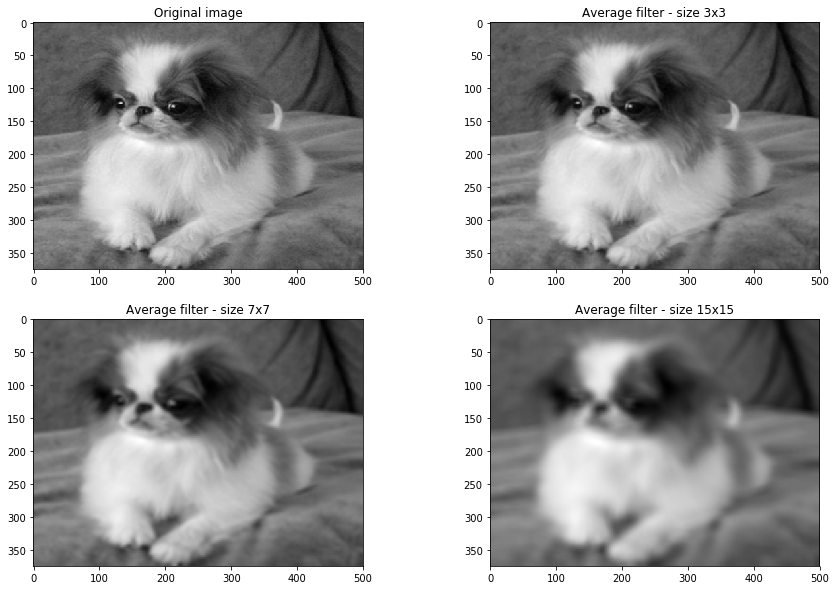

In [38]:
img_orig = load_image('images/n02085782-Japanese_spaniel/n02085782_1855.jpg')

show_images([
    (img_orig, 'Original image'), 
    (cv2.blur(img_orig, (3, 3)), 'Average filter - size 3x3'), 
    (cv2.blur(img_orig, (7, 7)), 'Average filter - size 7x7'), 
    (cv2.blur(img_orig, (15, 15)), 'Average filter - size 15x15')
])

## Filter: gaussian

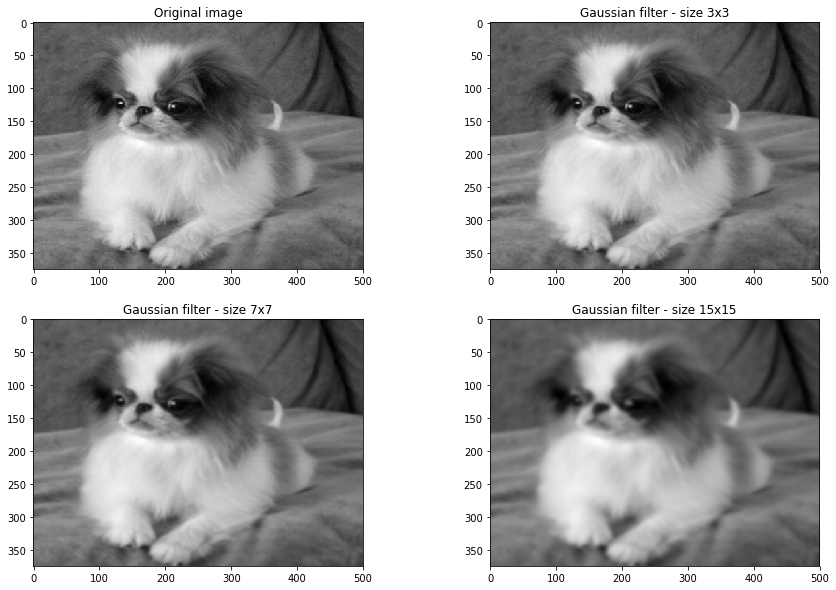

In [39]:
img_orig = load_image('images/n02085782-Japanese_spaniel/n02085782_1855.jpg')

show_images([
    (img_orig, 'Original image'), 
    (cv2.GaussianBlur(img_orig, (3, 3), 0), 'Gaussian filter - size 3x3'), 
    (cv2.GaussianBlur(img_orig, (7, 7), 0), 'Gaussian filter - size 7x7'), 
    (cv2.GaussianBlur(img_orig, (15, 15), 0), 'Gaussian filter - size 15x15')
])

## Filter: median

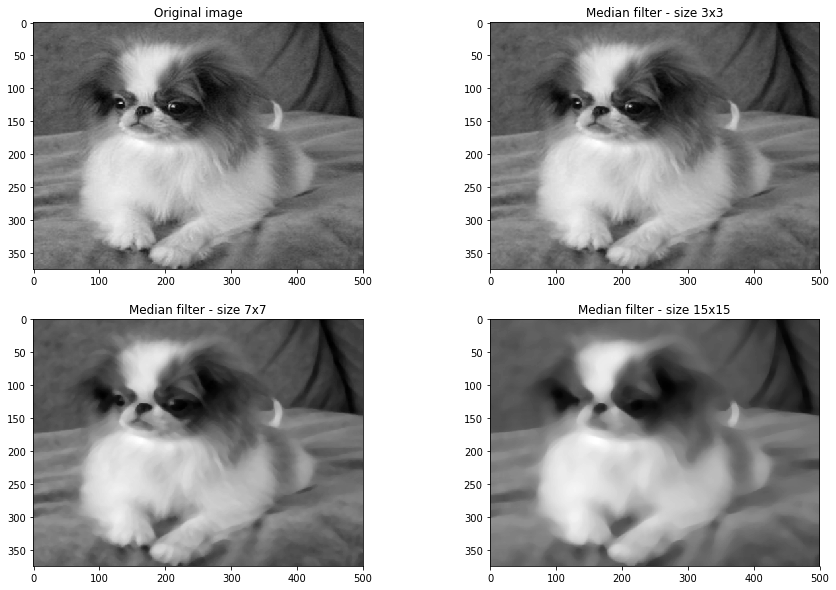

In [66]:
img_orig = load_image('images/n02085782-Japanese_spaniel/n02085782_1855.jpg')

show_images([
    (img_orig, 'Original image'), 
    (cv2.medianBlur(img_orig, 3), 'Median filter - size 3x3'), 
    (cv2.medianBlur(img_orig, 7), 'Median filter - size 7x7'), 
    (cv2.medianBlur(img_orig, 15), 'Median filter - size 15x15')
])

## Non-local means

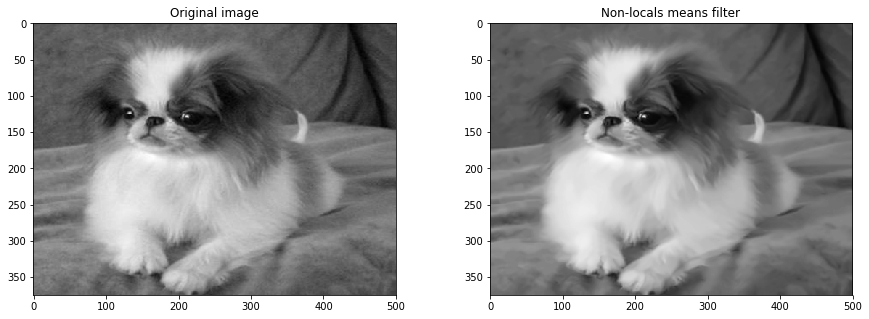

In [67]:
img_orig = load_image('images/n02085782-Japanese_spaniel/n02085782_1855.jpg')
img = cv2.fastNlMeansDenoising(img_orig)
show_images([
    (img_orig, 'Original image'),
    (img, 'Non-locals means filter')
])

## Whitening

In [32]:
N_BREEDS = 3
STD_SIZE = (500, 375)
PATH = 'images/'

images_orig, y = load_images(PATH, N_BREEDS, STD_SIZE)
images = np.array(images_orig)
images_temp = images.reshape(images.shape[0], -1)
images_temp = images_temp - images_temp.mean(axis=0)
cov = np.cov(images_temp, rowvar=True)
U, S, V = np.linalg.svd(cov)
epsilon = 1e-7
images_ZCA = np.dot(np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T)), images_temp)
images_ZCA_rescaled = 255 * (images_ZCA - images_ZCA.min()) / (images_ZCA.max() - images_ZCA.min())
images = images_ZCA_rescaled.reshape(images.shape[0], 375, 500).astype('uint8') 

Loaded 1/3: 152 images for breed: Chihuahua
Loaded 2/3: 185 images for breed: Japanese_spaniel
Loaded 3/3: 252 images for breed: Maltese_dog


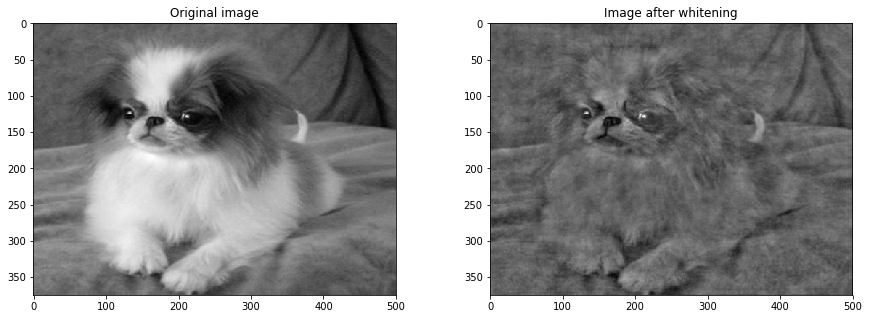

In [18]:
img_orig = load_image('images/n02085782-Japanese_spaniel/n02085782_1855.jpg')
show_images([
    (img_orig, 'Original image'),
    (images[193], 'Image after whitening')
])

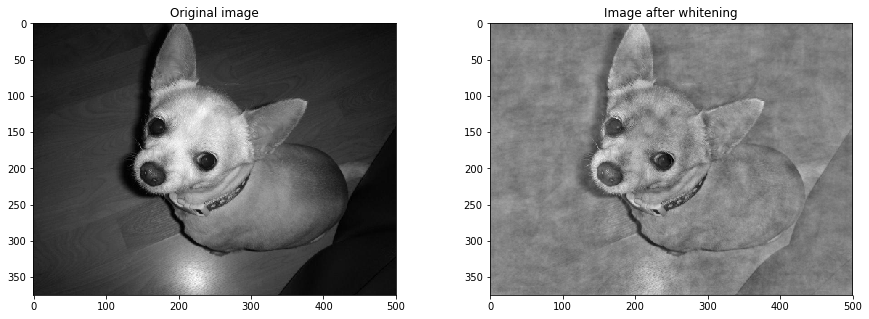

In [31]:
img_orig = load_image('images/n02085620-Chihuahua/n02085620_11696.jpg')
show_images([
    (img_orig, 'Original image'),
    (images[11], 'Image after whitening')
])

## SIFT features

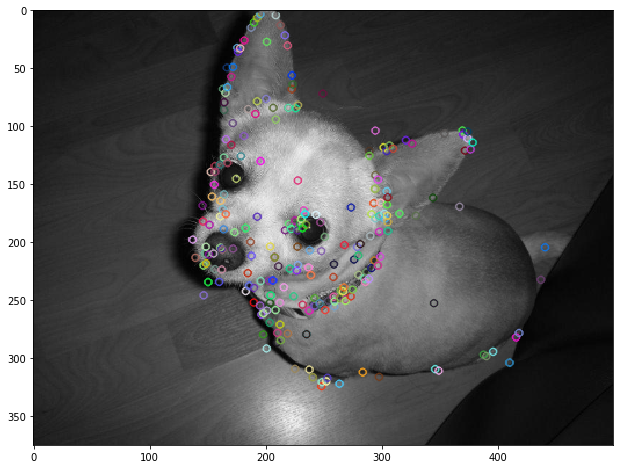

In [36]:
img_orig = load_image('images/n02085620-Chihuahua/n02085620_11696.jpg')
sift = cv2.xfeatures2d.SIFT_create()
kp, desc = sift.detectAndCompute(img_orig, None)

f, ax = plt.subplots(figsize = (15, 8))
ax.imshow(cv2.drawKeypoints(img_orig, kp, img_orig.copy()))
plt.show()

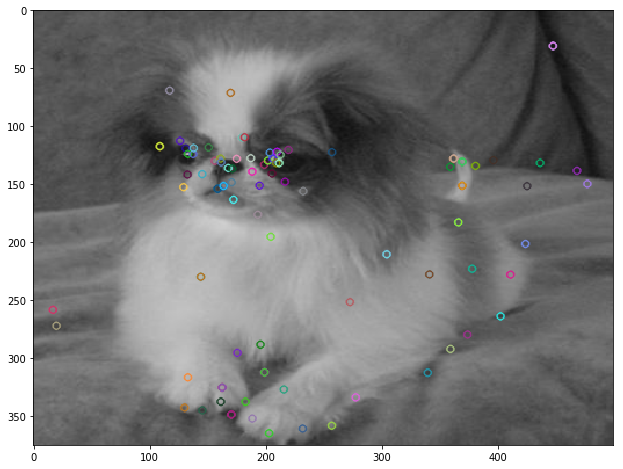

In [37]:
img_orig = load_image('images/n02085782-Japanese_spaniel/n02085782_1855.jpg')
sift = cv2.xfeatures2d.SIFT_create()
kp, desc = sift.detectAndCompute(img_orig, None)

f, ax = plt.subplots(figsize = (15, 8))
ax.imshow(cv2.drawKeypoints(img_orig, kp, img_orig.copy()))
plt.show()